# HEART FAILURE PREDICTION


In [1]:
# Data clearnning and EDA
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
cd C:\Users\PC\OneDrive - RMIT University\Desktop\Reasearch Methods\Group assignment\EEET2485-heart-failure-prediction-main

C:\Users\PC\OneDrive - RMIT University\Desktop\Reasearch Methods\Group assignment\EEET2485-heart-failure-prediction-main


In [3]:
data = pd.read_csv('data/heart_failure_clinical_records_dataset.csv')

In [4]:
categorical_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
numerical_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
health_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']

#### 3. The patients’ age and sex affect the health indicators 

##### ANOVA results

To analyze the effects of age and sex on other health indicators, we performed one-way ANOVA analysis of each indicator with age and sex as factors. The ANOVA tests yield crucial information which helps determine whether the null hypothesis is accepted or decline for each indicator

The ANOVA tests focus on performing Ordinary Least Square regression (OLS regression) between the factors and each dependent variable. The regression method estimates the parameters (slope and intercept) by minimizing the sum of square of differences between the available data and the predicted values. The method is chosen due to the simple model of the data (2 factors and 1 dependent variable for each model)

Crtical values:
Given data size = 299, degree of freedom = 2, significant level = 0.05, we have
<ul>
<li>F critical = 3.026</li>
<li>t critical = 1.968</li>
</ul>

In [5]:
# rsquared: get r squared
# fvalue: get f value
# f_pvalue: get p value
# params: get coefficient
# tvalues: get t-statistic

test_results = []
coef_results = []
t_results = []
f_pass_results = []
t_pass_results = []
f_crit = 3.026
t_crit = 1.968

for feature in health_features:
    results = smf.ols(feature + ' ~ age + sex', data=data).fit()
    
    test = [round(results.rsquared, 3), round(results.fvalue, 3), round(results.f_pvalue, 3)]
    coef = [round(results.params[1], 4), round(results.params[2], 4)]
    t = [round(results.tvalues[1], 3), round(results.tvalues[2], 3)]
    f_pass = ["Pass" if round(results.fvalue, 3) <= f_crit else "Fail"]
    t_pass = ["Pass" if (t[0] <= t_crit) and (t[0] >= t_crit * -1) else "Fail",
              "Pass" if (t[1] <= t_crit) and (t[1] >= t_crit * -1) else "Fail"]
    
    test_results.append(test)
    coef_results.append(coef)
    t_results.append(t)
    f_pass_results.append(f_pass)
    t_pass_results.append(t_pass)
    
    print('\033[1m ANOVA of age and sex with', feature,'\033[0m')
    print(results.summary())
    print('\n')

 ANOVA of age and sex with anaemia 
                            OLS Regression Results                            
Dep. Variable:                anaemia   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.697
Date:                Fri, 21 May 2021   Prob (F-statistic):             0.0691
Time:                        19:14:16   Log-Likelihood:                -211.47
No. Observations:                 299   AIC:                             428.9
Df Residuals:                     296   BIC:                             440.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0

##### Summary of the analysis

From the ANOVA results, the most crucial variables are selected. These include:
<ul>
<li>Coeeficients: shows the slope of each factor</li>
<li>F and p-value: determines whether the null hypothesis is rejected or not in general</li>
<li>t-statistics: determines whether the null hypothesis is rejected or not for each factor</li>    
<li>r-squared: determines how much data fits the regression model</li>
</ul>

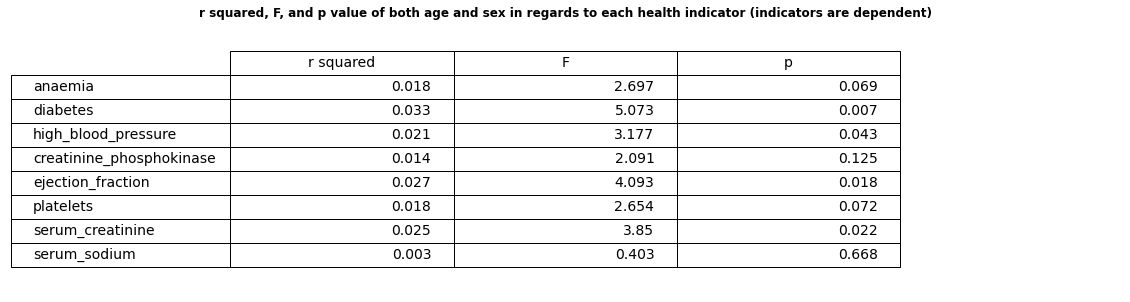

In [6]:
fig, ax = plt.subplots(figsize = (20,5)) 
ax.set_axis_off() 
table = ax.table( 
    cellText = test_results,  
    rowLabels = health_features,  
    colLabels = ['r squared', 'F', 'p'],
    colWidths = [0.1] * 3,
    loc = 'center') 
table.set_fontsize(14)
table.scale(2, 2)
   
ax.set_title('r squared, F, and p value of both age and sex in regards to each health indicator (indicators are dependent)', fontweight ="bold") 
   
plt.show() 

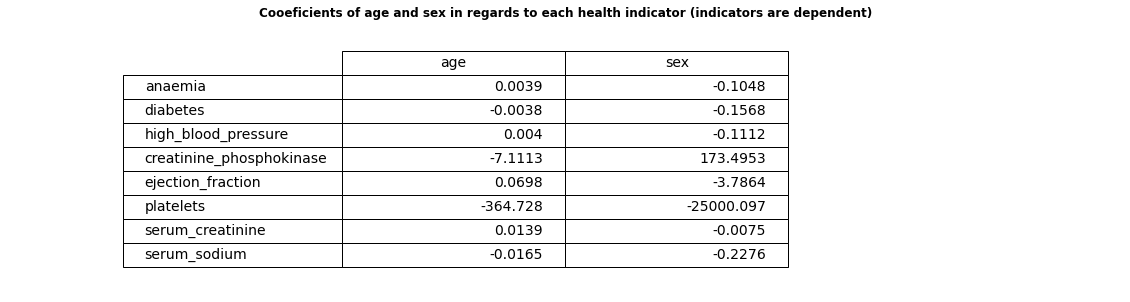

In [7]:
fig, ax = plt.subplots(figsize = (20,5)) 
ax.set_axis_off() 
table = ax.table( 
    cellText = coef_results,  
    rowLabels = health_features,  
    colLabels = ['age', 'sex'],
    colWidths = [0.1] * 2,
    loc = 'center') 
table.set_fontsize(14)
table.scale(2, 2)
   
ax.set_title('Cooeficients of age and sex in regards to each health indicator (indicators are dependent)', fontweight ="bold") 
   
plt.show() 

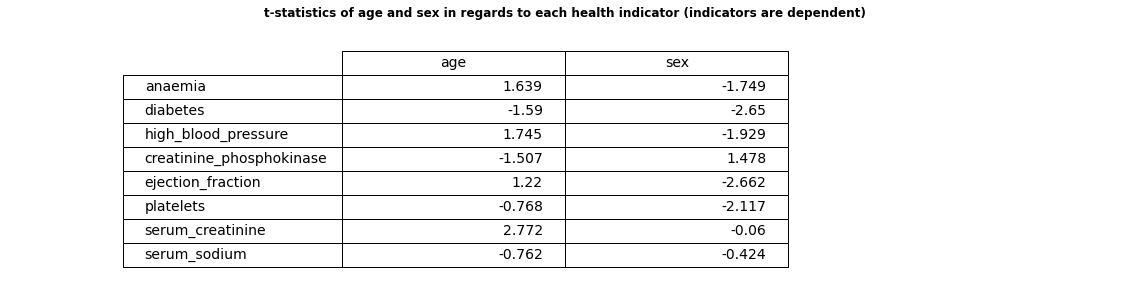

In [8]:
fig, ax = plt.subplots(figsize = (20,5)) 
ax.set_axis_off() 
table = ax.table( 
    cellText = t_results,  
    rowLabels = health_features,  
    colLabels = ['age', 'sex'],
    colWidths = [0.1] * 2,
    loc = 'center') 
table.set_fontsize(14)
table.scale(2, 2)
   
ax.set_title('t-statistics of age and sex in regards to each health indicator (indicators are dependent)', fontweight ="bold") 
   
plt.show() 

##### Results analysis

The null hypothesis result for each indicator is shown as below:

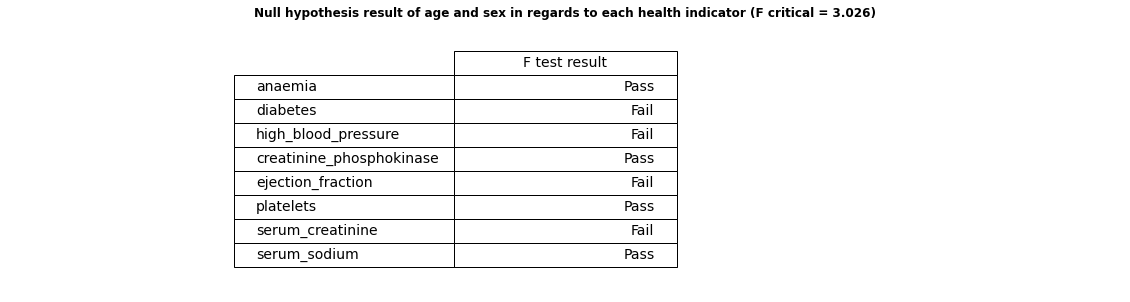

In [9]:
fig, ax = plt.subplots(figsize = (20,5)) 
ax.set_axis_off() 
table = ax.table( 
    cellText = f_pass_results,  
    rowLabels = health_features,  
    colLabels = ['F test result'],
    colWidths = [0.1],
    loc = 'center') 
table.set_fontsize(14)
table.scale(2, 2)
   
ax.set_title('Null hypothesis result of age and sex in regards to each health indicator (F critical = 3.026)', fontweight ="bold") 
   
plt.show() 

From this, we accept the null hypothesis of age and sex when the dependent variables are
<ul>
<li>Anaemia</li>
<li>Creatinine phosphokinase</li>
<li>Platelets</li>    
<li>Serum sodium</li>
</ul>
This means both factors together do not affect these indicators while the remaining indicators are affected

The t test result of age and sex in regards to each health indicator is shown as below:

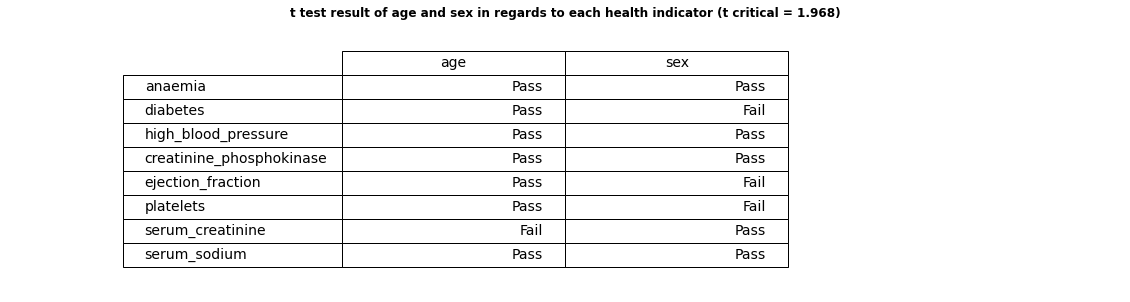

In [10]:
fig, ax = plt.subplots(figsize = (20,5)) 
ax.set_axis_off() 
table = ax.table( 
    cellText = t_pass_results,  
    rowLabels = health_features,  
    colLabels = ['age', 'sex'],
    colWidths = [0.1] * 2,
    loc = 'center') 
table.set_fontsize(14)
table.scale(2, 2)
   
ax.set_title('t test result of age and sex in regards to each health indicator (t critical = 1.968)', fontweight ="bold") 
   
plt.show() 

The results show how age and sex individually affects other indicators. If a factor passes the t test against an indicator, it means that the factor has no effect on it and vice versa.

From the results, we can confirm that:
<ol>
<li>Age individually affects:</li>
    <ul>
        <li>Serum creatinine</li>
    </ul>
<li>Sex individually affects:</li>
    <ul>
        <li>Diabetes</li>
        <li>Ejection fraction</li>
        <li>Platelets</li>
    </ul>
</ol>

#### 4. Do health indices affect the mortality rate of patients?


##### ANOVA results

For this task, we peform ANOVA analysis on DEATH_EVENT, with all other variables being factors

Crtical values: Given data size = 299, degree of freedom = 12, significance level = 0.05, we have:
<ul>
<li>F critical = 1.786</li>
<li>t critical = 1.968</li>
</ul>

In [11]:
# rsquared: get r squared
# fvalue: get f value
# f_pvalue: get p value
# params: get coefficient
# tvalues: get t-statistic

test_results = []
coef_and_t_results = []
t_pass_results = []
t_crit = 1.968
index = 1

results = smf.ols('DEATH_EVENT ~ age + anaemia + creatinine_phosphokinase + diabetes + ejection_fraction + high_blood_pressure' +
                  ' + platelets + serum_creatinine + serum_sodium + sex + smoking + time', data=data).fit()

test_values = [round(results.rsquared, 3), round(results.fvalue, 3), round(results.f_pvalue, 3)]
test_results.append(test_values)
while index < len(results.params):
    coef_and_t = [round(results.params[index], 4), round(results.tvalues[index], 3)]
    t_pass = ["Pass" if (round(results.tvalues[index], 3) <= t_crit) and (round(results.tvalues[index], 3) >= t_crit * - 1) else "Fail"]
    
    coef_and_t_results.append(coef_and_t)
    t_pass_results.append(t_pass)
    index += 1

print(results.summary())
print('\n')

                            OLS Regression Results                            
Dep. Variable:            DEATH_EVENT   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     17.04
Date:                Fri, 21 May 2021   Prob (F-statistic):           2.35e-27
Time:                        19:14:18   Log-Likelihood:                -115.90
No. Observations:                 299   AIC:                             257.8
Df Residuals:                     286   BIC:                             305.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

##### Summary of the analysis

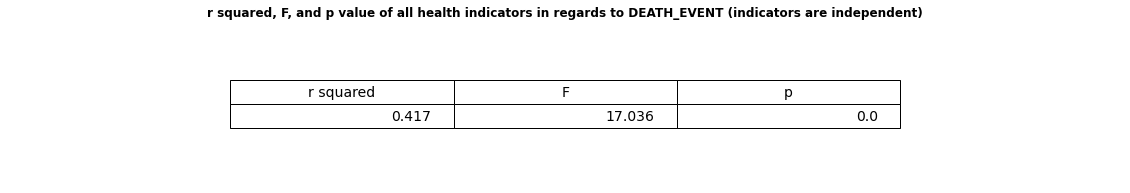

In [12]:
fig, ax = plt.subplots(figsize = (20,3)) 
ax.set_axis_off() 
table = ax.table( 
    cellText = test_results,    
    colLabels = ['r squared', 'F', 'p'],
    colWidths = [0.1] * 3,
    loc = 'center') 
table.set_fontsize(14)
table.scale(2, 2)
   
ax.set_title('r squared, F, and p value of all health indicators in regards to DEATH_EVENT (indicators are independent)', fontweight ="bold") 
   
plt.show() 

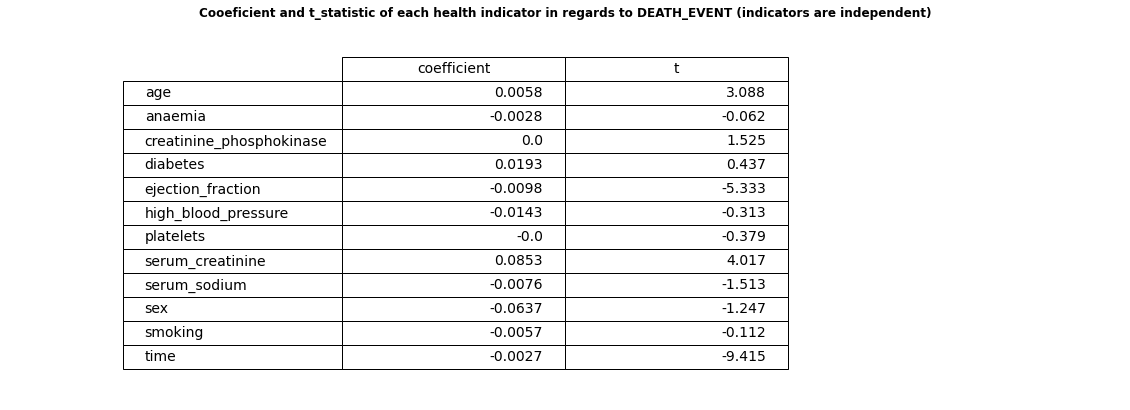

In [13]:
fig, ax = plt.subplots(figsize = (20,7)) 
ax.set_axis_off() 
table = ax.table( 
    cellText = coef_and_t_results,  
    rowLabels = data.columns[:12],  
    colLabels = ['coefficient', 't'],
    colWidths = [0.1] * 2,
    loc = 'center') 
table.set_fontsize(14)
table.scale(2, 2)
   
ax.set_title('Cooeficient and t_statistic of each health indicator in regards to DEATH_EVENT (indicators are independent)', fontweight ="bold") 
   
plt.show() 

##### Results analysis

With the F value being 17.036 while the F critical value is 1.786, we reject the null hypothesis. This means that all health indicators together affect the mortality rate

The t test result of each indicator against DEATH_EVENT is shown as below:

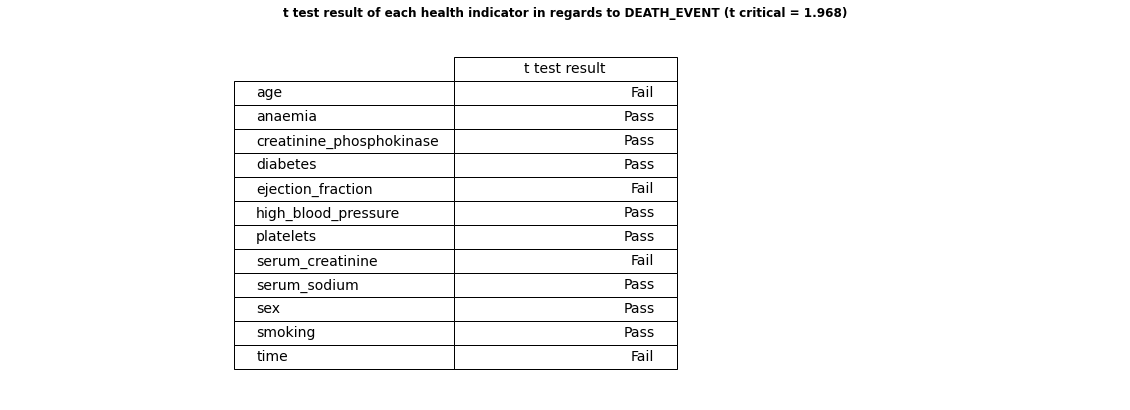

In [14]:
fig, ax = plt.subplots(figsize = (20,7)) 
ax.set_axis_off() 
table = ax.table( 
    cellText = t_pass_results,  
    rowLabels = data.columns[:12],  
    colLabels = ['t test result'],
    colWidths = [0.1],
    loc = 'center') 
table.set_fontsize(14)
table.scale(2, 2)
   
ax.set_title('t test result of each health indicator in regards to DEATH_EVENT (t critical = 1.968)', fontweight ="bold") 
   
plt.show()

From this, we notice that only 4 indicators fail the t test against DEATH_EVENT, which are:
<ul>
<li>Age</li>
<li>Ejection fraction</li>
<li>Serum creatinine</li>    
<li>Time</li>
</ul>
This means that only these factors affect the mortality rate